In [23]:
'''
'age' : 국내 공연 < 내한 공연
'gender' : 유의미X
'membership_type_1' : 유의미X
'membership_type_2' : 유의미X
'membership_type_3' : 유의미X
'membership_type_4' : 유의미X
'membership_type_5' : 유의미X
'membership_type_6' : 유의미X
'tran_date'
'tran_time'
'play_date'
'play_st_time'
'seat'
'price' : 국내 공연 > 내한 공연
'ticket_cancel'
'discount_type'
'performance_code'
'pre_open_date'
'open_date'
'genre'
'place'
'running_time'
'intermission'
'member_yn'
'공연명'
'내한여부'
'''

"\n'age'\n'gender'\n'membership_type_1'\n'membership_type_2'\n'membership_type_3'\n'membership_type_4'\n'membership_type_5'\n'membership_type_6'\n'tran_date'\n'tran_time'\n'play_date'\n'play_st_time'\n'seat'\n'price'\n'ticket_cancel'\n'discount_type'\n'performance_code'\n'pre_open_date'\n'open_date'\n'genre'\n'place'\n'running_time'\n'intermission'\n'member_yn'\n'공연명'\n'내한여부'\n"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.options.display.float_format="{:.5f}".format
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
sns.set_palette('Set2')

In [4]:
data = pd.read_csv('data/제공데이터_공연명_내한_매칭.csv')

In [5]:
data.head(1)

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn,공연명,내한여부
0,50.00000,M,무료,NaN,NaN,NaN,NaN,NaN,20220206,1615,20220302,1930,1층 B블록12열 7,180000,0,일반,897,20220109.00000,20220110.00000,독주,콘서트홀,90,0,Y,"국립합창단 위대한 합창 Ⅰ, 칼 오르프 & 카르미나 부라나",0


In [6]:
data.columns

Index(['age', 'gender', 'membership_type_1', 'membership_type_2',
       'membership_type_3', 'membership_type_4', 'membership_type_5',
       'membership_type_6', 'tran_date', 'tran_time', 'play_date',
       'play_st_time', 'seat', 'price', 'ticket_cancel', 'discount_type',
       'performance_code', 'pre_open_date', 'open_date', 'genre', 'place',
       'running_time', 'intermission', 'member_yn', '공연명', '내한여부'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791458 entries, 0 to 791457
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                350895 non-null  float64
 1   gender             351105 non-null  object 
 2   membership_type_1  351105 non-null  object 
 3   membership_type_2  284185 non-null  object 
 4   membership_type_3  102989 non-null  object 
 5   membership_type_4  18570 non-null   object 
 6   membership_type_5  856 non-null     object 
 7   membership_type_6  0 non-null       float64
 8   tran_date          791458 non-null  int64  
 9   tran_time          791458 non-null  int64  
 10  play_date          791458 non-null  int64  
 11  play_st_time       791458 non-null  int64  
 12  seat               791458 non-null  object 
 13  price              791458 non-null  int64  
 14  ticket_cancel      791458 non-null  int64  
 15  discount_type      791458 non-null  object 
 16  pe

In [8]:
data['내한여부'].value_counts()

0    648678
1    142780
Name: 내한여부, dtype: int64

In [9]:
data_0 = data[data['내한여부'] == 0]
data_1 = data[data['내한여부'] == 1]

### 나이(age)
+ 국내 공연 < 내한 공연 : 5,60대의 비율이 증가함

In [10]:
print(f"국내 공연 평균 : {data_0['age'].mean()}, 내한 공연 평균: {data_1['age'].mean()}")

국내 공연 평균 : 42.7660640073882, 내한 공연 평균: 43.6006631586535


#### 국내 공연

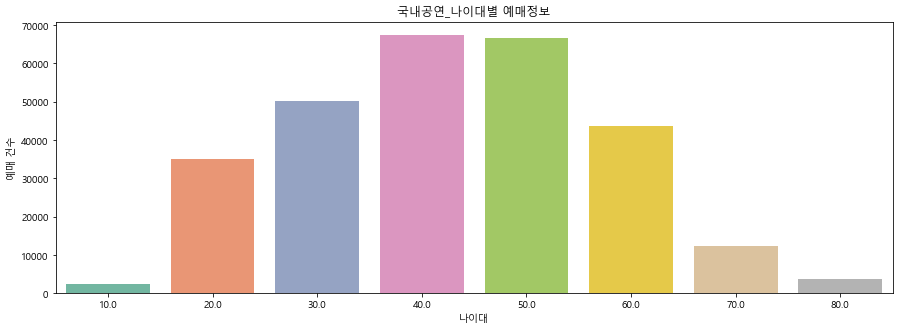

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(x='age', data=data_0, order=data_0['age'].unique().tolist().sort(key=lambda x: str(x)[:2]))
plt.xlabel("나이대")
plt.ylabel("예매 건수")
plt.title("국내공연_나이대별 예매정보")
plt.show()

#### 내한 공연

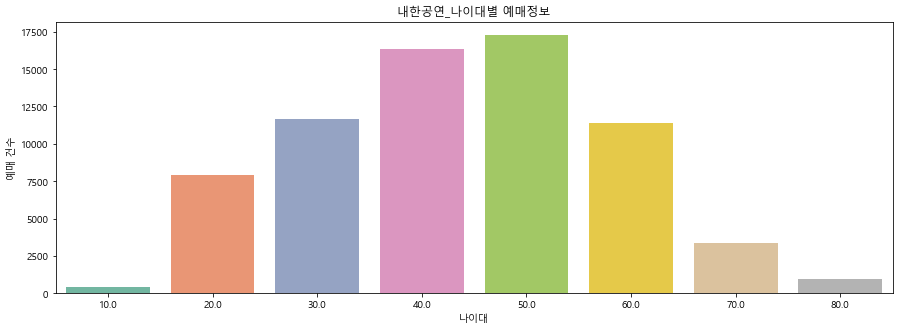

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(x='age', data=data_1, order=data_1['age'].unique().tolist().sort(key=lambda x: str(x)[:2]))
plt.xlabel("나이대")
plt.ylabel("예매 건수")
plt.title("내한공연_나이대별 예매정보")
plt.show()

### 성별(gender)

#### 국내 공연

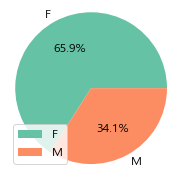

In [13]:
plt.figure(figsize=(3,3))
grouped_0 = data_0.groupby('gender').size().reset_index(name='counts')
plt.rc('font', size=12)

# Plot the pie chart
plt.pie(grouped_0['counts'], labels=grouped_0['gender'], autopct='%1.1f%%')
plt.legend(grouped_0['gender'], loc='lower left')
plt.axis('equal')
plt.show()

#### 내한 공연

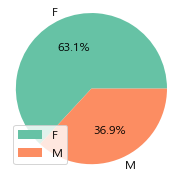

In [14]:
plt.figure(figsize=(3,3))
grouped_1 = data_1.groupby('gender').size().reset_index(name='counts')
plt.rc('font', size=12)

# Plot the pie chart
plt.pie(grouped_1['counts'], labels=grouped_1['gender'], autopct='%1.1f%%')
plt.legend(grouped_1['gender'], loc='lower left')
plt.axis('equal')
plt.show()

### membership_type_1
+ 유의미한 차이 X

#### 국내 공연

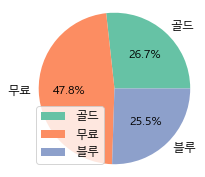

In [15]:
plt.figure(figsize=(3,3))
grouped_0 = data_0.groupby('membership_type_1').size().reset_index(name='counts')
plt.rc('font', size=12)

# Plot the pie chart
plt.pie(grouped_0['counts'], labels=grouped_0['membership_type_1'], autopct='%1.1f%%')
plt.legend(grouped_0['membership_type_1'], loc='lower left')
plt.axis('equal')
plt.show()

#### 내한 공연

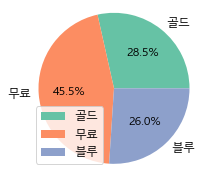

In [16]:
plt.figure(figsize=(3,3))
grouped_1 = data_1.groupby('membership_type_1').size().reset_index(name='counts')
plt.rc('font', size=12)

# Plot the pie chart
plt.pie(grouped_1['counts'], labels=grouped_1['membership_type_1'], autopct='%1.1f%%')
plt.legend(grouped_1['membership_type_1'], loc='lower left')
plt.axis('equal')
plt.show()

### membership_type_2
+ 유의미한 차이 X

#### 국내 공연

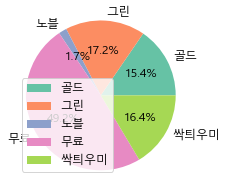

In [17]:
plt.figure(figsize=(3,3))
grouped_0 = data_0.groupby('membership_type_2').size().reset_index(name='counts')
plt.rc('font', size=12)

# Plot the pie chart
plt.pie(grouped_0['counts'], labels=grouped_0['membership_type_2'], autopct='%1.1f%%')
plt.legend(grouped_0['membership_type_2'], loc='lower left')
plt.axis('equal')
plt.show()

#### 내한 공연

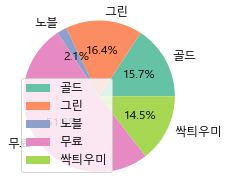

In [18]:
plt.figure(figsize=(3,3))
grouped_1 = data_1.groupby('membership_type_2').size().reset_index(name='counts')
plt.rc('font', size=12)

# Plot the pie chart
plt.pie(grouped_1['counts'], labels=grouped_1['membership_type_2'], autopct='%1.1f%%')
plt.legend(grouped_1['membership_type_2'], loc='lower left')
plt.axis('equal')
plt.show()

### membership_type_3
+ 유의미한 차이 X

#### 국내 공연

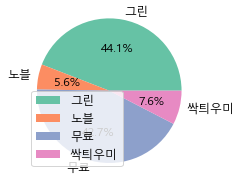

In [19]:
plt.figure(figsize=(3,3))
grouped_0 = data_0.groupby('membership_type_3').size().reset_index(name='counts')
plt.rc('font', size=12)

# Plot the pie chart
plt.pie(grouped_0['counts'], labels=grouped_0['membership_type_3'], autopct='%1.1f%%')
plt.legend(grouped_0['membership_type_3'], loc='lower left')
plt.axis('equal')
plt.show()

#### 내한 공연

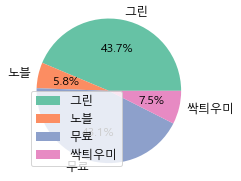

In [20]:
plt.figure(figsize=(3,3))
grouped_1 = data_1.groupby('membership_type_3').size().reset_index(name='counts')
plt.rc('font', size=12)

# Plot the pie chart
plt.pie(grouped_1['counts'], labels=grouped_1['membership_type_3'], autopct='%1.1f%%')
plt.legend(grouped_1['membership_type_3'], loc='lower left')
plt.axis('equal')
plt.show()

### 가격(price)

In [21]:
print(f"국내 공연 평균 : {data_0['price'].mean()}, 내한 공연 평균: {data_1['price'].mean()}")

국내 공연 평균 : 31024.49443329356, 내한 공연 평균: 29179.878134192462


In [25]:
data_0['price'].value_counts()[0]

348280

In [26]:
sum(data_0['price']) / (data_0['price'].count() - data_0['price'].value_counts()[0])

66994.1444350495

In [27]:
sum(data_1['price']) / (data_1['price'].count() - data_1['price'].value_counts()[0])

54751.33714435902

In [28]:
data_0['price'].max(), data_1['price'].max(), 

(480000, 330000)

In [29]:
data_0['price'].min(), data_1['price'].min(), 

(0, 0)

In [31]:
data_1['price'].value_counts()

0        66685
10000     8863
30000     5164
15000     3962
50000     3758
         ...  
79000        5
17000        4
1000         4
92000        1
67000        1
Name: price, Length: 120, dtype: int64

In [29]:
data_0['price'].value_counts()

0         348280
10000      25320
30000      15246
50000      12439
40000      10650
           ...  
272000         4
119000         3
195000         3
106000         3
11000          1
Name: price, Length: 191, dtype: int64

#### 국내 공연

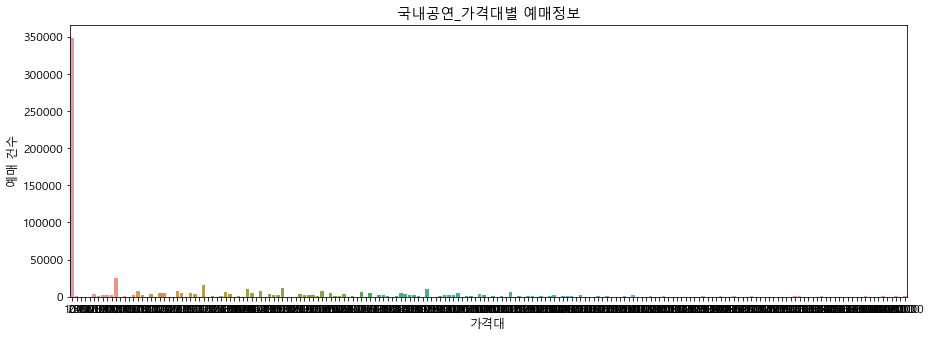

In [28]:
plt.figure(figsize=(15,5))
sns.countplot(x='price', data=data_0, order=data_0['price'].unique().tolist().sort(key=lambda x: str(x)[:3]))
plt.xlabel("가격대")
plt.ylabel("예매 건수")
plt.title("국내공연_가격대별 예매정보")
plt.show()

#### 내한 공연

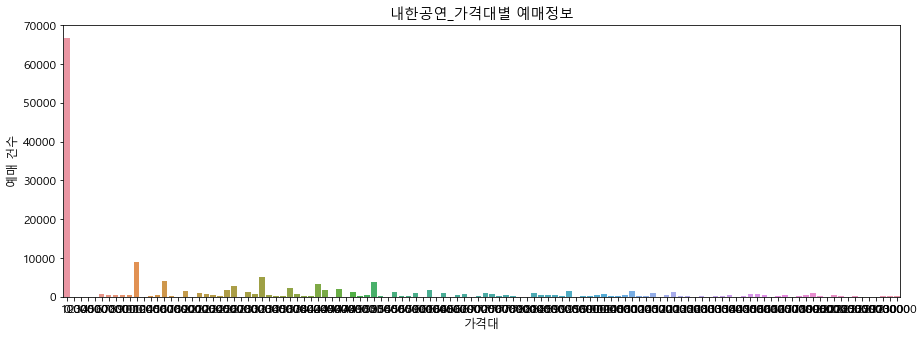

In [36]:
plt.figure(figsize=(15,5))
sns.countplot(x='price', data=data_1, order=data_1['price'].unique().tolist().sort(key=lambda x: str(x)[:3]))
plt.xlabel("가격대")
plt.ylabel("예매 건수")
plt.title("내한공연_가격대별 예매정보")
plt.show()

### 예매 취소(ticket_cancel)

#### 국내 공연

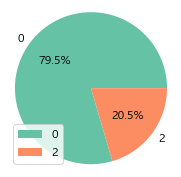

In [25]:
plt.figure(figsize=(3,3))
grouped_0 = data_0.groupby('ticket_cancel').size().reset_index(name='counts')
plt.rc('font', size=12)

# Plot the pie chart
plt.pie(grouped_0['counts'], labels=grouped_0['ticket_cancel'], autopct='%1.1f%%')
plt.legend(grouped_0['ticket_cancel'], loc='lower left')
plt.axis('equal')
plt.show()

#### 내한 공연

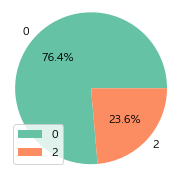

In [26]:
plt.figure(figsize=(3,3))
grouped_1 = data_1.groupby('ticket_cancel').size().reset_index(name='counts')
plt.rc('font', size=12)

# Plot the pie chart
plt.pie(grouped_1['counts'], labels=grouped_1['ticket_cancel'], autopct='%1.1f%%')
plt.legend(grouped_1['ticket_cancel'], loc='lower left')
plt.axis('equal')
plt.show()